# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

# Students:

*   Andre Nicolai Gutiérrez Bautista
*   Fernando Guzmán Briones
*   Julio Osvaldo Hernández Bucio
*   Genaro Rodríguez Vázquez


#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset



- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


# Import required librearies

In [1]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
#from google.colab import drive # To get files from google drive


%load_ext autoreload
%autoreload 2
%matplotlib inline


## Obtain the data from csv files

The following methods were created to avoid issues depending on if team was working on Google Collab or locally.

In [2]:
def mount_folder(parent_folder, path, from_google_drive):
  """
    Mounts a folder (Google Drive or local) and changes the current working directory.

    Args:
        path (str): The path to the folder to be mounted or used.
        parent_folder (str): The parent folder where 'path' should be mounted or appended.
        from_google_drive (bool): Indicates whether the data is from Google Drive (True) or local (False).

    Returns:
        None
  """
  if from_google_drive:
    drive.mount(parent_folder)
    DIR = path
  else:
    DIR = parent_folder + path
  os.chdir(DIR)

def get_dataframe(file_name):
  """
    Reads a CSV file and returns its data as a Pandas DataFrame.

    Args:
        file_name (str): The name or path of the CSV file to be read.

    Returns:
        A Pandas DataFrame containing the data from the CSV file.
  """
  return pd.read_csv(file_name)

In [3]:
#Google collab version
#path = "/content/drive/MyDrive/Colab Notebooks/MNA/TC5033 - Advanced Machine Learning Methods/Semana 2/asl_data" # Change for asl_data if you are running this locally
#parent_folder = '/content/drive' # Change for ./ if you are running this locally
#mount_folder(parent_folder, path, from_google_drive=True)

#train_df = get_dataframe('sign_mnist_train.csv')
#valid_df = get_dataframe('sign_mnist_valid.csv')

In [4]:
#Local version
DATA_PATH = './asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179



### Print how many classes do we have on our collection (To use it on CNN output)

In [6]:
print(train_df["label"].unique())
print(len(train_df["label"].unique()))

[ 3  6  2 12 15  8 21 17  9 19 16 18 20 22 23  1 11 10 14  4  0  5  7 13]
24


## Import Images

In [7]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])

# Deleting output label ('label')(Column to predict)
train_df = train_df.drop('label', axis=1)
valid_df = valid_df.drop('label', axis=1)

# Convertion to float shouldn't ocurr here but latter into the Normalisation phase
x_train = train_df.values
x_val = valid_df.values

Check for the shape of the dataframes

In [8]:
def print_df_shape(*dataframes):
  """
    Prints the shape of each desired DataFrame along with its name.

    Args:
        *dataframes (pd.DataFrame): Variable arguments to print its shape.
  """
  for dataframe in dataframes:
    for var_name, var in globals().items():
      if var is dataframe:
        print(f"Shape of {var_name} dataset is: {dataframe.shape}")

In [9]:
print_df_shape(x_train, x_val, y_train, y_val)

Shape of x_train dataset is: (27455, 784)
Shape of x_val dataset is: (7172, 784)
Shape of y_train dataset is: (27455,)
Shape of y_val dataset is: (7172,)


Now, we split "validation" into 'validation' and 'test' datasets to avoid memory leakage

In [10]:
def split_val_test(x, y, pct=0.3, shuffle=True):

    """

    Splits the input features 'x' and labels 'y' into validation and test subsets.

    Parameters:
    - x: Input features (numpy array or list)
    - y: Labels (numpy array or list)
    - pct: Percentage of data to allocate for the validation set (float between 0 and 1)
    - shuffle: Whether to shuffle the data before splitting (default is True)

    Returns:
    - x_validation: Features of the validation set.
    - y_validation: Labels of the validation set.
    - x_test: Features of the test set.
    - y_test: Labels of the test set.

    """

    # Check if the percentage is within the valid range
    if not 0 <= pct <= 1:
        raise ValueError("Percentage 'pct' should be between 0 and 1.")

    # Determine the number of samples for the validation set
    num_samples = len(x)
    num_validation_samples = int(num_samples * pct)

    # Create an index array for shuffling if needed
    if shuffle:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
    else:
        indices = np.arange(num_samples)

    # Split the data based on the shuffled indices
    validation_indices = indices[:num_validation_samples]
    test_indices = indices[num_validation_samples:]

    # Create the validation and test subsets
    x_validation, y_validation = x[validation_indices], y[validation_indices]
    x_test, y_test = x[test_indices], y[test_indices]

    return x_validation, y_validation, x_test, y_test

In [11]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)
print_df_shape(x_val, x_test, y_val, y_test)

Shape of x_val dataset is: (2151, 784)
Shape of x_test dataset is: (5021, 784)
Shape of y_val dataset is: (2151,)
Shape of y_test dataset is: (5021,)





---


At this point, we can infer:

    27455 images belong to train dataset
    5021 images belong to validation dataset
    2151 images belong to test dataset

    784 pixels -> 1 image (1 row on csv)


---



In [12]:
# Remove undesired letters to predict
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')

# Print possible letters to predict
print('Number of possible letters to predict: ', len(alphabet))
print('Possible letters to predict: ', alphabet)

Number of possible letters to predict:  24
Possible letters to predict:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']


## Normalise

In [13]:
# Get the x_mean and the x_std first
x_mean = x_train.mean()
x_std = x_train.std()

In [14]:
def normalise(x_mean, x_std, x_data):
  """
    Normalizes a dataset by subtracting the mean and dividing by the standard deviation.

    Args:
        x_mean (float): The mean value used for normalization.
        x_std (float): The standard deviation used for normalization.
        x_data (dataframe): The data to be normalized.

    Returns:
        The normalized data.
  """
  return (x_data - x_mean) / x_std

In [15]:
# Normalise the train, validation and test data
x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

## Graficar muestras

In [16]:
def plot_number(image):
  """
    Plots and displays a grayscale image.

    Args:
        image (np.ndarray): The grayscale image to be plotted.
  """
  plt.figure(figsize=(5,5))
  plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
  plt.axis('off')
  plt.show()

This is how a random selected array from dataset, converted to 28*28 image looks like


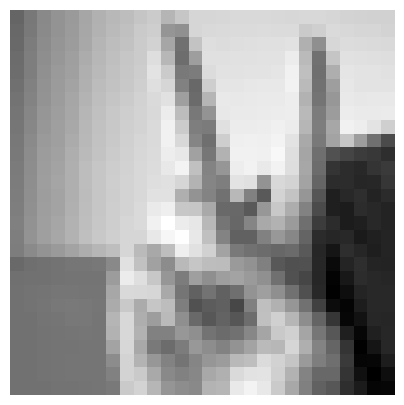

In [17]:
# Generates a random integer
rnd_idx = np.random.randint(len(y_test))

# Reshape array form 784*1 1D np.array   -->   28*28 2D np.array
# to make it possible to be plot as greyscale image
print("This is how a random selected array from dataset, converted to 28*28 image looks like")
plot_number(x_train[rnd_idx].reshape(28,28))

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [18]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

In [19]:
create_minibatches

<function __main__.create_minibatches(mb_size, x, y, shuffle=True)>

## Nuestra clase Linear, ReLU y Sequential

###  Clase Linear

In [20]:
class np_tensor(np.ndarray): pass

In [21]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # esta el foward de la clase lineal
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [22]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Clase Sequential

In [23]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

In [24]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

## Loop de entrenamiento

In [25]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'cost: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

In [26]:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total


In [27]:
# We need to change the output classes according to possible predictions (in this case 24 possible classes found on train_df)

# 1st hidden layer
# Linear(784, 200) --> 784 inputs / 200 outputs
# ReLU() Activation type

# 2nd hidden layer --> 200 inputs / 200 outputs. The inputs are the outputs of the first hidden layer
# Linear(200, 200)
# ReLU() Activation type

# Classification layer  --> 200 inputs / 24 classes to predict
# Linear(200,24)

model = Sequential_layers([Linear(784, 32), ReLU(),
                            Linear(32, 64), ReLU(),
                            Linear(64, 128), ReLU(),
                            Linear(128,24)])

# mini batch size is mainly limited by the hardware we use for the training (OOM error will ocurr when exceeding)
# The smaller the batch size, the slower it takes to train
# Not necesarily the bigger the value, the better the accuracy
# Normally we use multiple of bytes (8, 32, 64, 128, 256, etc...)
mb_size = 256

# The smaller the learning rate is, the slower it takes to train
# Using a BIG learning rate is prompt to overfit
learning_rate = 0.0001

#50 epochs were needed to reach a decent level of accuracy using this fully connected network
epochs = 50

## Create your model and train it

In [28]:
train(model, epochs, mb_size, learning_rate)

cost: 1.5227825077457, accuracy: 0.43654114365411434
cost: 0.5917584629835463, accuracy: 0.5774058577405857
cost: 0.5085046121241493, accuracy: 0.6638772663877266
cost: 0.2813938508770091, accuracy: 0.6875871687587168
cost: 0.24318328313521753, accuracy: 0.702928870292887
cost: 0.1565413846522537, accuracy: 0.7224546722454672
cost: 0.13614376409909343, accuracy: 0.7136215713621571
cost: 0.07785700648314803, accuracy: 0.7140864714086471
cost: 0.04096336643577466, accuracy: 0.7243142724314272
cost: 0.039944841499992535, accuracy: 0.7205950720595072
cost: 0.052884236384030066, accuracy: 0.7247791724779172
cost: 0.023747149953921957, accuracy: 0.7261738726173873
cost: 0.029670893333863902, accuracy: 0.7252440725244073
cost: 0.024723483130782355, accuracy: 0.7322175732217573
cost: 0.03323501244790993, accuracy: 0.7275685727568573
cost: 0.015698659649366408, accuracy: 0.7317526731752673
cost: 0.01761292671194617, accuracy: 0.7340771734077174
cost: 0.016417362073725274, accuracy: 0.7345420734

In [29]:
# Get the accuracy reached
print("Accuracy reached: ", (accuracy(x_test, y_test, mb_size))*100, '%')

Accuracy reached:  74.28799044015136 %


## Test your model on Random data from your test set

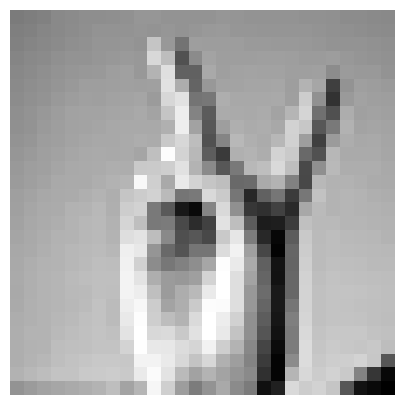

el valor predicho es: v el valor real es:v


In [30]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')

# Conclusion

We were able to reach a decent level of accuracy (>70%) NOT ONLY by tunning hyperparameters such as batch size, learning rate, epochs, etc. But we also modify the fully connected network architecture.